In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("/content/book.csv")
data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [4]:
data.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# most popular items
count = data.loc[:,:].sum()
count

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

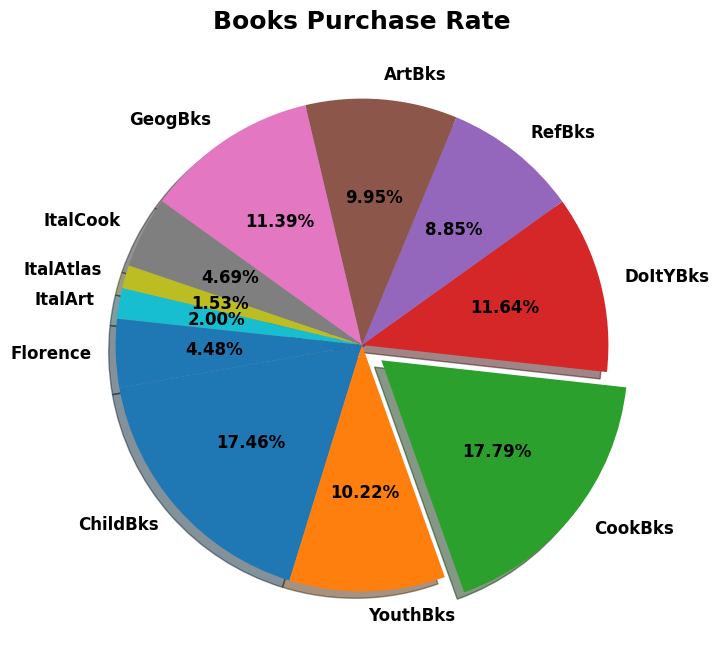

In [6]:
plt.figure(figsize = (12,8))
plt.pie(data.sum(),
       labels=data.columns,
       explode = [0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Books Purchase Rate", fontsize = 18, fontweight = 'bold')
plt.show()

In [7]:
# Top 10 Popular items

count.sort_values(0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

,items,count
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


In [8]:
# Support and Length
# If we divide all items with row number, we can find Support value. Our threshold value is 0.2 for Support value.
# Product Frequency / Total Sales

first = pd.DataFrame(data.sum() / data.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first#

,Support
CookBks,0.4310
ChildBks,0.4230
DoItYBks,0.2820
GeogBks,0.2760
YouthBks,0.2475
ArtBks,0.2410
RefBks,0.2145
ItalCook,0.1135
Florence,0.1085
ItalArt,0.0485


In [9]:
# With 10% Support

frequent_itemsets=apriori(data,min_support=0.1,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(ChildBks, YouthBks)",2


In [10]:
# with 30% Confidence

rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
84,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
85,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
86,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
87,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114


In [11]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
70,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
72,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
77,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
76,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834
...,...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870


In [19]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions

lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
84,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
85,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
86,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
87,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114


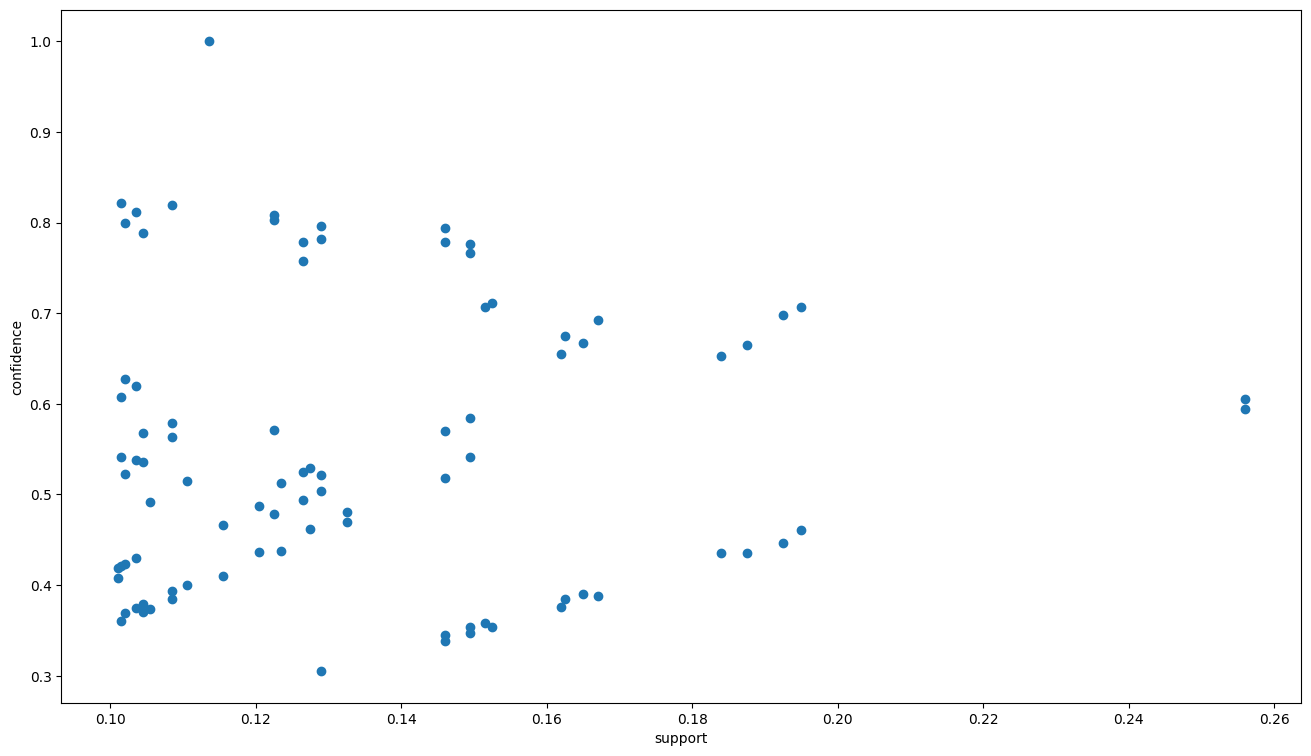

In [20]:
# visualization of obtained rule

plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [21]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix

consequents,(YouthBks),(ChildBks),(CookBks),(DoItYBks),(RefBks),(ArtBks),(GeogBks),"(YouthBks, CookBks)","(ChildBks, CookBks)","(DoItYBks, CookBks)","(ChildBks, DoItYBks)","(GeogBks, CookBks)","(ChildBks, GeogBks)","(ChildBks, ArtBks)","(ArtBks, CookBks)"
antecedents,,,,,,,,,,,,,,,
(ChildBks),1.576044,NaN,1.404179,1.542511,1.669725,1.594028,1.670264,1.882497,NaN,1.840820,NaN,1.835989,NaN,NaN,NaN
(YouthBks),NaN,1.576044,1.518667,1.654846,NaN,1.693281,1.764017,NaN,2.035985,NaN,NaN,NaN,NaN,NaN,NaN
(CookBks),1.518667,1.404179,NaN,1.542677,1.649549,1.607763,1.618245,NaN,NaN,NaN,1.841017,NaN,1.778809,NaN,NaN
"(GeogBks, DoItYBks)",NaN,1.864490,1.899926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(GeogBks, CookBks)",NaN,1.835989,NaN,1.998711,NaN,2.230964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(ChildBks, GeogBks)",NaN,NaN,1.778809,1.900346,NaN,2.170444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(ArtBks, CookBks)",NaN,1.790745,NaN,2.155264,NaN,NaN,2.245509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(ChildBks, ArtBks)",NaN,NaN,1.806175,NaN,NaN,NaN,2.274247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(RefBks, CookBks)",NaN,1.899004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0.5, 0, "frozenset({'YouthBks'})"),
  Text(1.5, 0, "frozenset({'ChildBks'})"),
  Text(2.5, 0, "frozenset({'CookBks'})"),
  Text(3.5, 0, "frozenset({'DoItYBks'})"),
  Text(4.5, 0, "frozenset({'RefBks'})"),
  Text(5.5, 0, "frozenset({'ArtBks'})"),
  Text(6.5, 0, "frozenset({'GeogBks'})"),
  Text(7.5, 0, "frozenset({'YouthBks', 'CookBks'})"),
  Text(8.5, 0, "frozenset({'ChildBks', 'CookBks'})"),
  Text(9.5, 0, "frozenset({'DoItYBks', 'CookBks'})"),
  Text(10.5, 0, "frozenset({'ChildBks', 'DoItYBks'})"),
  Text(11.5, 0, "frozenset({'GeogBks', 'CookBks'})"),
  Text(12.5, 0, "frozenset({'ChildBks', 'GeogBks'})"),
  Text(13.5, 0, "frozenset({'ChildBks', 'ArtBks'})"),
  Text(14.5, 0, "frozenset({'ArtBks', 'CookBks'})")])

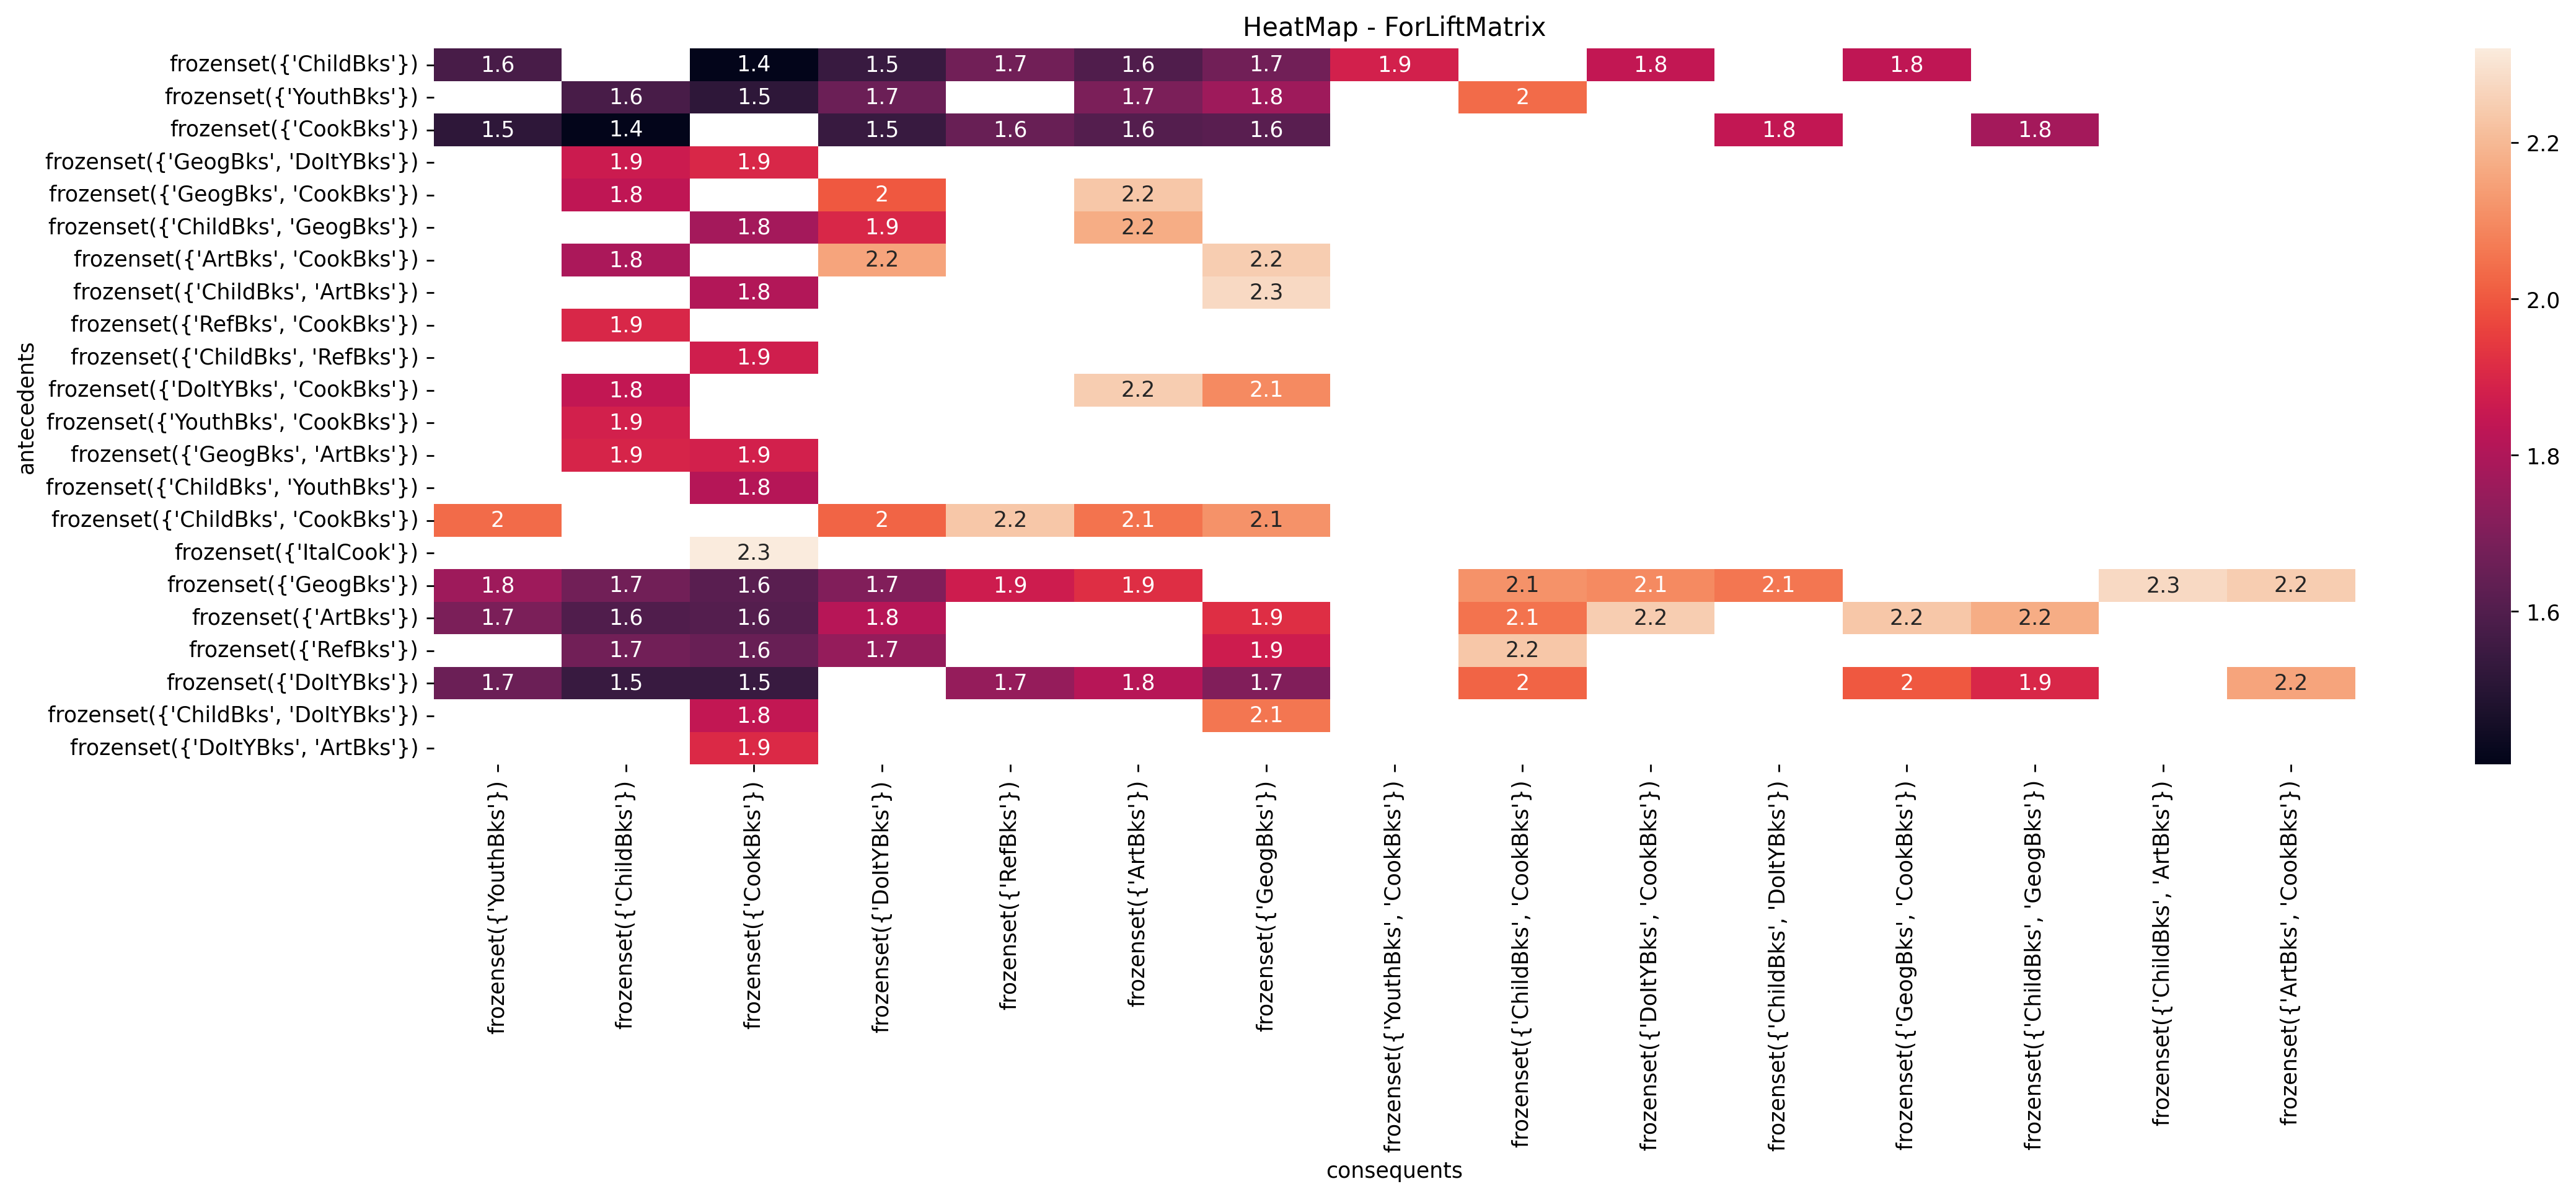

In [22]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [23]:
# Association rules with 20% Support and 60% confidence

# With 20% Support

frequent_itemsets=apriori(data,min_support=0.2,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(ChildBks, CookBks)",2


In [28]:
# with 60% Confidence

rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124,0.498856


In [25]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124,0.498856


In [29]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions

lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124,0.498856


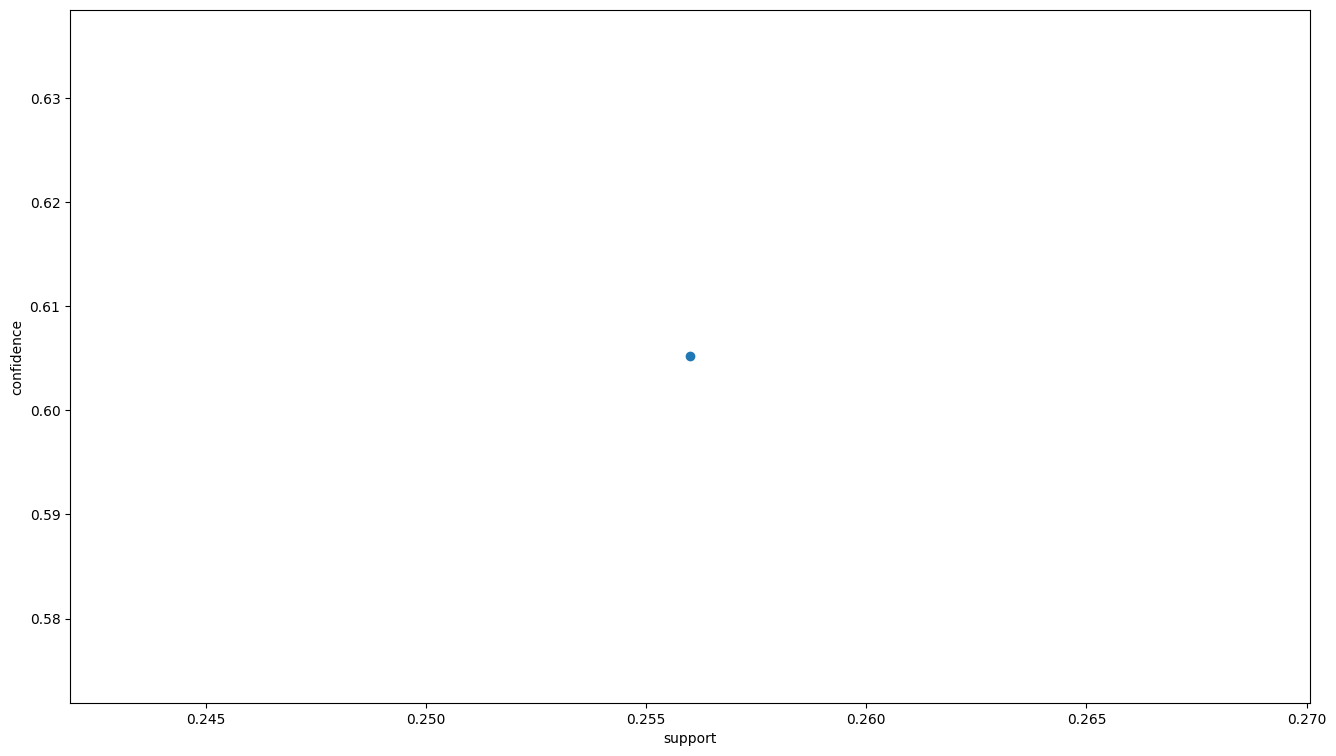

In [27]:
# visualization of obtained rule

plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [30]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix

consequents,(CookBks)
antecedents,
(ChildBks),1.404179


(array([0.5]), [Text(0.5, 0, "frozenset({'CookBks'})")])

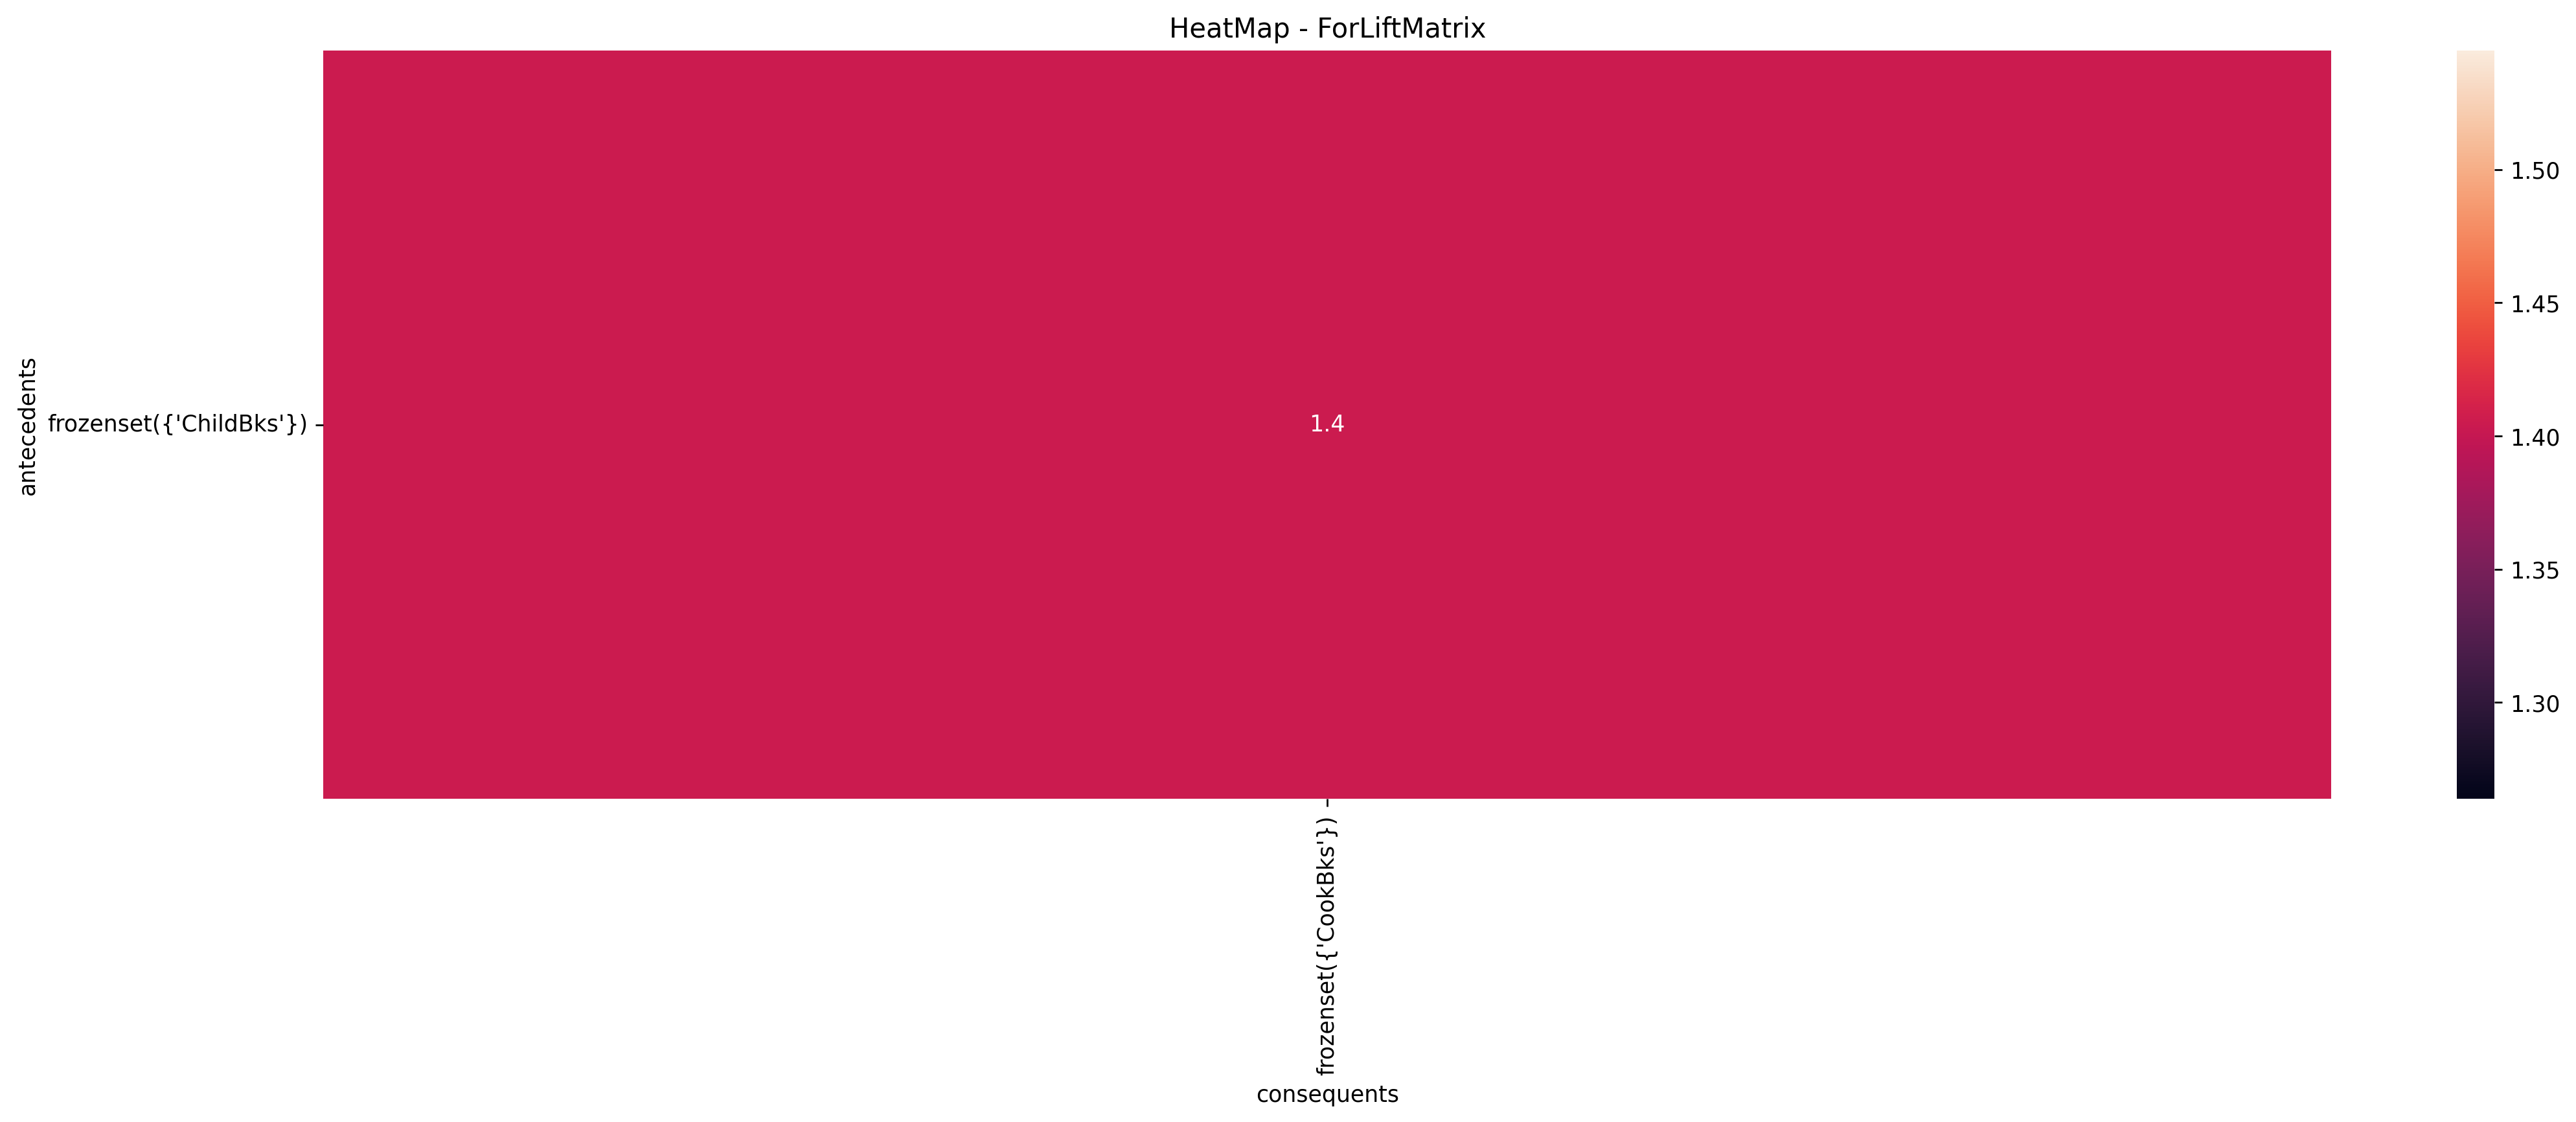

In [31]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)